# Homework #7 (100 pts)
**Due:** Thursday March 1st, 11:59PM via Blackboard.  

**Name:** *name here*,  **Student Id:** *Your ID here*

In this homework we will review a bit about traffic engineering, and start learning about delays (queues) in networks and how to simulate them.

## Problem 1.  Traffic Engineering Review Questions (20 pts)

**(a)** How many paths are available between a source and a destination node in a tree network?

**(b)** What "control plane protocol" causes problems if an Ethernet network contains loops?

**(c)** Can we use shortest paths to forward packets in an Ethernet network using SDNs? If so what packet header field(s) would we match on?

**(d)** Can we use shortest paths to forward IP packets without OSPF in an SDN network? If so what packet header field(s) would we match on?

**(e)** Would you every want to use something other than the shortest path for transmission between two nodes in a packet switched network? If so give an example.

**(f)** Can you name any other path computation techniques that we've used in class other than shortest paths? If so list them.

**(g)** If you have a network that contains many loops can you ever find a tree subgraph for that network?  What must that tree subgraph include?



In [3]:
# The following enables embedded ploting via matplot lib.
%matplotlib notebook
import matplotlib.pyplot as plt

## Problem 2. Random Variables, Histograms, and Generators in Python


**(a)** Generate and print 10 samples of a uniformly distributed continuous random variable with plain Python.  Used 10,000 samples (don't print!) to compute the mean and compare against theory.

**(b)** Generate an print 10 samples of a Bernoulli random variable with $p = 0.31$ Used 10,000 samples (don't print!) to compute the mean and compare against theory.

**(c)** Generate and plot the histogram (see [histogram2.py](http://www.grotto-networking.com/files/DESPython/histogram2.py) for an example) based on 100,000 samples of an exponential distribution with parameter $\lambda = 0.43$

**(d)** Write a Python generator function that creates a generator that outputs fo91rever the sequence of strings: "Hi CS6591", "From your_name", "Hi CS6591", "From your_name", "Hi CS6591", "From your_name", ... Show the definition of the generator and its use.


In [4]:
import simpy
from SimComponents import PacketGenerator, PacketSink, SwitchPort, PortMonitor

## Problem 3. A Minimal Packet Simulation Library
In this problem and the rest of the course we are going to use my [SimComponents.py](http://www.grotto-networking.com/files/DESPython/SimComponents.py) to perform network simulations directly in Python with the help of the [SimPy](https://simpy.readthedocs.io/en/latest/) library that you **need** to install using `pip install simpy`. 

**(a)** Connect a single *PacketGenerator* instance to a single *PacketSink* instance. Have the PacketGenerator generate a new packet every 5 seconds and have the packet size be exponentially distributed so that the average packet size is 200 bytes. Put the *PacketSink* into debug mode and run the simulation long enough to see four packet arrivals at the sink.

**(b)** Connect a three *PacketGenerator* instances to a single *PacketSink* instance. Have the PacketGenerator generate a new packet every 1, 2, and 3 seconds respectively and have the packet size be constant so that the average packet size is 425 bytes. Put the *PacketSink* into debug mode and run the simulation long enough to see four packet arrivals at the sink of each source at the sink. Give the sources some type of string identifier.

**(c)** In part (a) what is the average transmission rate of the source in bits per second?

**(d)** In part (a) if we assume that the packets are transmitted every 5 micro seconds what is the average transmission rate of the source in bits per second?



## Problem 4. Many CBR Sources and a Single Switch Port


**(a)** Write or use my Python code in this notebook to create 100 constant bit rate (CBR) video sources (*PacketGenerator*s) to a switch port output (*SwitchPort*). Our sources will use constant length 1250 byte packets, transmitted every 2mS (5Mbps per stream). The switch port has an output bandwidth of 1Gbps.  We will want to monitor the output queue over time so you will also need to use a *PortMonitor*. Run this simulation for 6 ms. Do you see queues build up and go down? Why?

**(b)** Keeping the overall bit rate the same rerun the simulation with a packet size of 625 bytes. Does this appear to help.

**(c)** Rerun (a) and (b) but this time with the *PortMonitor* tracking bytes in the queue rather than packets in the queue `count_bytes=True`. From this perspective did reducing the packet size help? Will the smaller packets see a shorter average delay?

**(d)** In part (a) randomized the initial sending time for each source using a uniform random variable between 0 and the `packet_time`. Rerun the simulation and compare the plot to part (a). Did this help reduce the queue length? Is there a lesson here?


inter-packet arrival time = 2000.0 in micro seconds
Maximum wait = 1000.0 micro seconds
Maximum queue size in bytes = 100
average system occupancy in bytes: 16.803133855642606


<IPython.core.display.Javascript object>


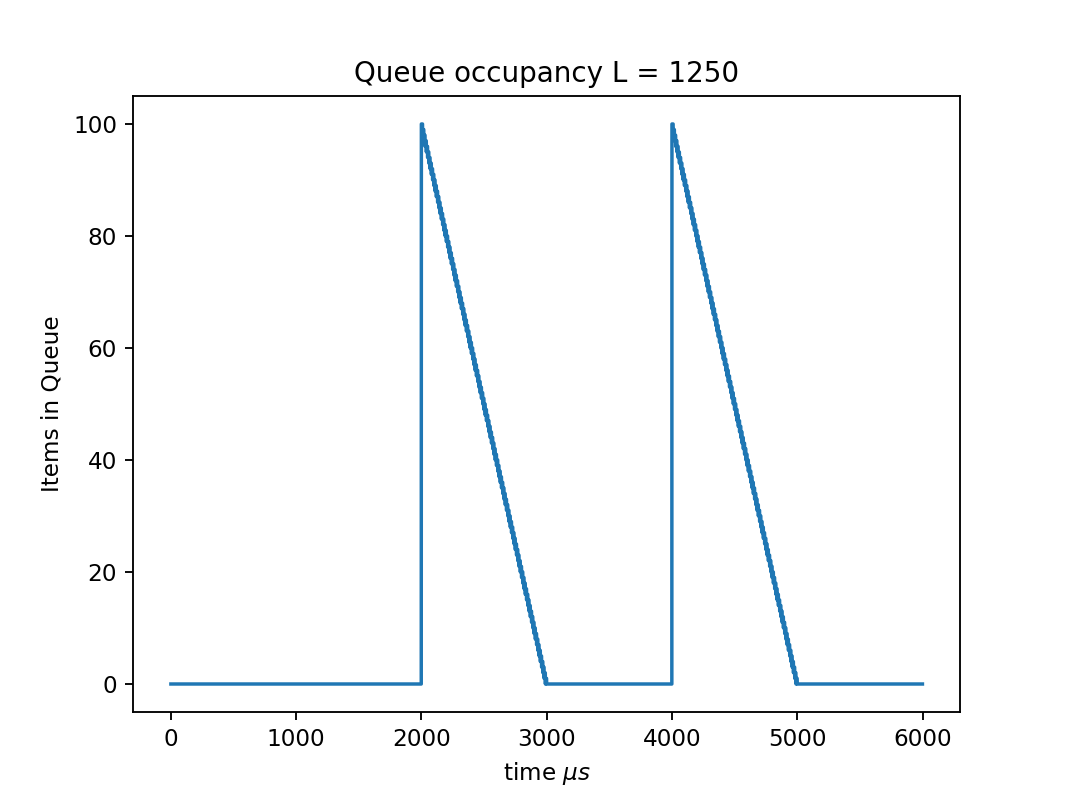

In [2]:
# This is how I did set up the simulation
N = 100     # Number of sources
r = 5.0     # average source rate is 5Mbps
C = 1000.0  # Port rate is 1Gbps
L = 1250    # bytes per packet
packet_time = 8*L/r  # in micro seconds
print("inter-packet arrival time = {} in micro seconds".format(packet_time))

def cbr_dist():
    return packet_time

def size_dist():
    return L

def samp_dist():
    return 1.0

env = simpy.Environment()  # Create the SimPy environment
ps = PacketSink(env, debug=False)
switch_port = SwitchPort(env, C)
# Create N packet generators and wire them to the switch port
pgs = []
for i in range(N):
    name = "pg{}".format(i)
    pg = PacketGenerator(env, name, cbr_dist, size_dist, initial_delay=0)
    pg.out = switch_port
    pgs.append(pg)
# If you want to monitor any switch ports, use a PortMonitor.
pm = PortMonitor(env, switch_port, samp_dist, count_bytes=False)
switch_port.out = ps  # wire switch port to  sink
env.run(until=6000)  # Run time in micro seconds
print("Maximum wait = {} micro seconds".format(max(ps.waits)))
print("Maximum queue size in packets = {}".format(max(pm.sizes)))
print("average system occupancy in packets: {}".format(float(sum(pm.sizes))/len(pm.sizes)))

fig, axis = plt.subplots()
axis.plot(pm.sizes)
axis.set_title("Queue occupancy L = {}".format(L))
axis.set_xlabel(r"time $\mu s$")
axis.set_ylabel("Items in Queue")
plt.show()

## Problem 5. Modeling a Switch Output Port (M/M/1 queueing system)

**(a)** Suppose we have a switch port with a 1Gbps rate, and that the packet sizes seen by the switch are exponentially distributed with a mean size of 755 bytes.  If the interarrival times of the packets are exponentially distributed what is the mean interarrive time to produce an average link utilization of 0.86?

**(b)** Given the above system (an M/M/1 queueing system) what would be the average delay seen by a packet and the average queue size?

**(c)** Simulate the above system. See [CompMM1Example.py](http://www.grotto-networking.com/files/DESPython/CompMM1Example.py) but use your numbers from part (a). Run the simulation long enough to see reasonable agreement between theory and simulation.

